# Impute missing data using forward and backward filling

This notebook shows how we can use the forward and backward filling methods to fill missing data for a time series.

We will work with a monthly retail sales dataset (found [here](https://raw.githubusercontent.com/facebook/prophet/master/examples/example_retail_sales.csv)).

For instructions on how to download, prepare, and store the dataset, refer to notebook number 1, in the folder "01-Create-Datasets" from this repo.

## Data Set Synopsis

The timeseries is between January 1992 and Apr 2005.

It consists of a single series of monthly values representing sales volumes. 

In [1]:
import pandas as pd
import seaborn as sns

sns.set_context("talk")

# Load dataset

In [2]:
df = pd.read_csv(
    "../Datasets/example_retail_sales_with_missing_data.csv",
    parse_dates=["ds"],
    index_col=["ds"],
)

In [3]:
df.head()

,y
ds,
1992-01-01,146376.0
1992-02-01,147079.0
1992-03-01,159336.0
1992-04-01,163669.0
1992-05-01,170068.0


# Check for missing data

We check for missing data in the target and quantify how many missing values there are.

In [4]:
n_missing = df["y"].isnull().sum()

print(f"Number of datapoints missing: {n_missing}")
print(f"Proportion of dataset missing: {n_missing/len(df):.2%}")

Number of datapoints missing: 33
Proportion of dataset missing: 20.62%


We plot the time series to see where the data is missing.

Text(0.5, 0, 'Time')

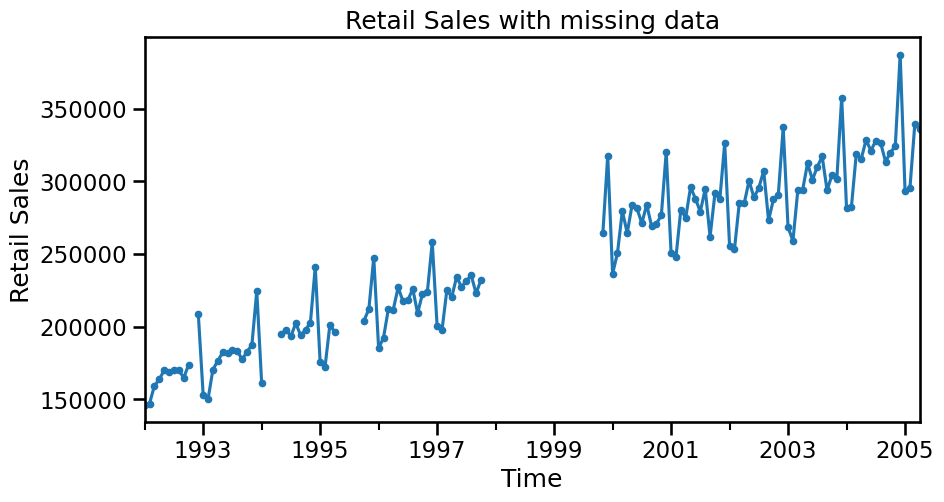

In [5]:
ax = df.plot(marker=".", figsize=[10, 5], legend=None)
ax.set_title("Retail Sales with missing data")
ax.set_ylabel("Retail Sales")
ax.set_xlabel("Time")

# Forward fill method (aka. last observation carried forward)

Apply the forward fill method. This method is also known as "last observation carried forward".

Text(0.5, 0, 'Time')

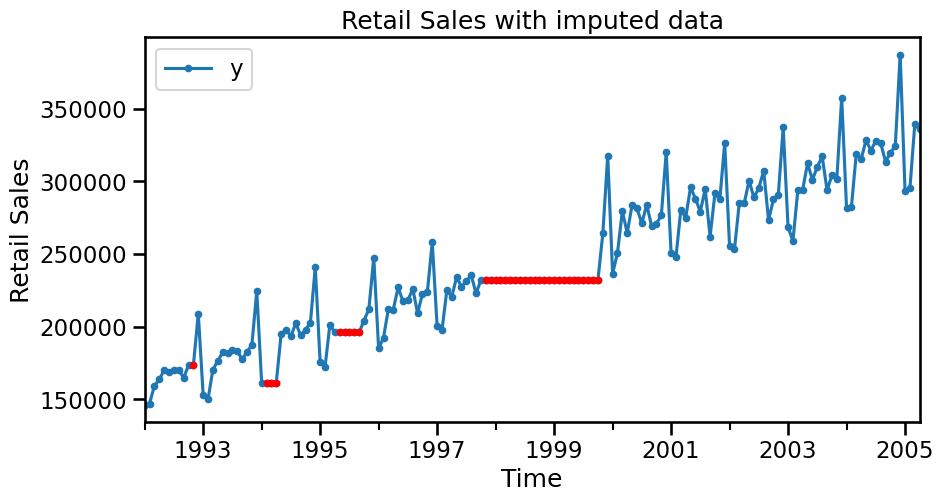

In [6]:
# Apply the forward fill method (where missing data - fill nan.)
df_imputed = df.fillna(method="ffill")

# Plot the imputed time series
ax = df_imputed.plot(linestyle="-", marker=".", figsize=[10, 5])
df_imputed[df.isnull()].plot(ax=ax, legend=None, marker=".", color="r")

ax.set_title("Retail Sales with imputed data")
ax.set_ylabel("Retail Sales")
ax.set_xlabel("Time")

We now compare this with the backfill method. This method is also known as "next observation carried backwards".

## Backward fill method (aka. next observation carried backwards)

Text(0.5, 0, 'Time')

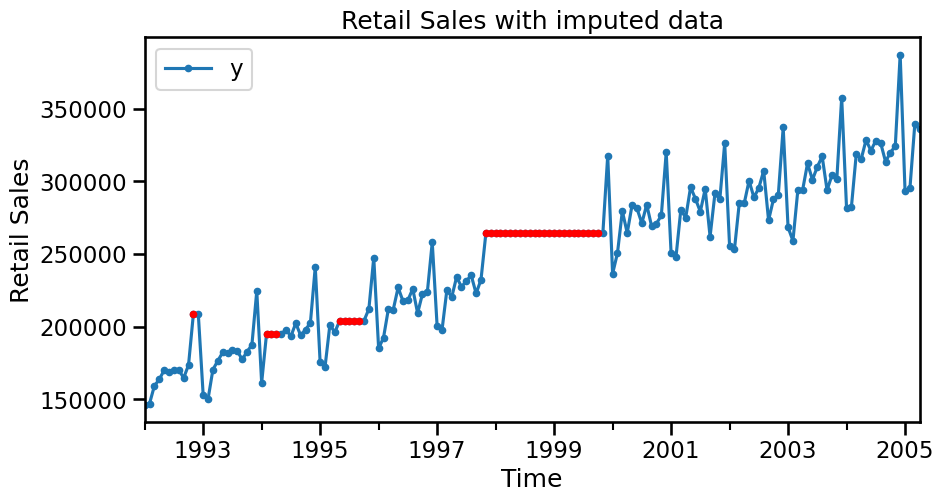

In [7]:
# Apply the backfill method
df_imputed = df.fillna(method="bfill")

# Plot the imputed time series
ax = df_imputed.plot(linestyle="-", marker=".", figsize=[10, 5])
df_imputed[df.isnull()].plot(ax=ax, legend=None, marker=".", color="r")

ax.set_title("Retail Sales with imputed data")
ax.set_ylabel("Retail Sales")
ax.set_xlabel("Time")

The above figures show that these methods can distort important structures of the time series (e.g., the shape of a seasonal component) depending on how large the gaps of missing data are. If these gaps are small then the distortions are small, if the gaps are large then the distortions are also large. A gap is small or large relative to structures found in the time series (i.e., the lengths of the seasonal period or steepness of a trend line).

The distortions to the time series created by data imputation can negatively impact the fitting of a model. If the proportion of missing data is small then the impact of these distortions on the fitting of a model should be less and may be tolerable depending on the use case.

One minor advantage of forward filling over backward filling is that it does not leak any data from the future to the imputed data points.  The impact of this depends on how much data has been imputed and may not make a noticeable difference if the size of the missing value gaps is small.

If a dataset has missing data with small gap sizes then forward filling would be a sufficient method to impute missing data without distorting the time series too heavily and ensuring no data leakage is occurring. 